<h1> Комментарий ревьюера </h1>

Привет, Юлия!
Меня зовут Виктория Ильина, и я буду проверять твой проект. Предлагаю общаться на "ты", но если тебе будет не комфортно, обязательно сообщи и мы перейдем на "вы". 

Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе стать специалистом по Data Science. Ты уже проделала большую работу над проектом, но давай сделаем его ещё лучше. Ниже ты найдёшь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать различные цвета, чтобы было легче воспринимать мои комментарии:

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера❌:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера🤔:</b> Так выделены небольшие замечания. Одно-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Однако, если перед нами стоит цель не просто сдать проект и забыть, а приобрести новые знания и успешно применять их в будущем, я бы всё-таки рекомендовала тебе прорабатывать эти недочёты.
</div>
    
<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Так я выделю все остальные комментарии.
</div>
    
Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии - пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Например, вот так.
</div>

Давай посмотрим, что получилось!

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [16]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('/datasets/insurance.csv')

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Все библиотеки импортированы и данные загружены, можем двигаться дальше!
</div>

In [3]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Оценим значения в столбцах датасета

In [7]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Как видно из таблицы - количество мужчин и женщин примерно одинаково, средний возраст застрахованного составляет 31 год, при этом самому взрослому застрахованному 65 лет, а самому молодому 18 лет. Средняя заплтата среди участников составляет 40 000 рублей,самый низкий доход составляет 5 300 рублей, а самый высокий 79 000 рублей. Страховые выплаты в среднем получают 15% застрахованных.  
Из всего вышеперчисленного следует вывод:  
- в предоставленной базе данных застрахованных лиц нет людей с очень большим заработком;
- страховая компания не работает с людьми младше 18 лет и старше 65 лет;
- страховые выплаты происходят в 15% случаев, класс не сбалансированный, т.е. если мы возьмем константную модель, которая предсказыввает всегда отсутсвие выплаты, то точность модели составим 75%. (по хорошему, этот класс надо сбалансировать, однако для решения задачи этого не требуется.)

Оценим корреляцию среди признаков.

In [10]:
corr_matrix = data.corr()
display(corr_matrix)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.002074,0.014910,-0.008991,0.010140
Возраст,0.002074,1.000000,-0.019093,-0.006692,0.651030
Зарплата,0.014910,-0.019093,1.000000,-0.030296,-0.014963
Члены семьи,-0.008991,-0.006692,-0.030296,1.000000,-0.036290
Страховые выплаты,0.010140,0.651030,-0.014963,-0.036290,1.000000


<AxesSubplot:>

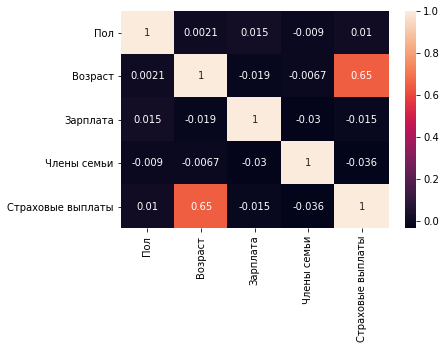

In [11]:
sn.heatmap(corr_matrix, annot=True)

Между возрастом и наличием страховой выплаты, безусловно, сильная связь (коэффициент корреляции составляет 0.65). Посмотрим как именно связан возраст и страховая выплата.

In [18]:
x = data['Возраст']

y= data['Страховые выплаты']

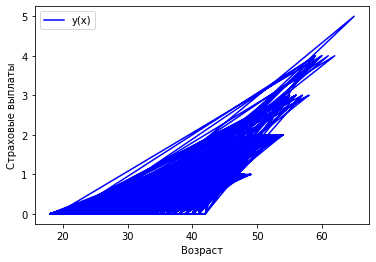

In [19]:
fig, ax = plt.subplots()                        
ax.plot(x, y, color="blue", label="y(x)")     

ax.set_xlabel("Возраст")                              
ax.set_ylabel("Страховые выплаты")                            
ax.legend()                                     

plt.show()                                 

Судя по графику, чем выше возраст застрахованного лица, тем чаще компания платит ему страховые выплаты.

Определим целевой признак и признаки

In [5]:
X = data.drop('Страховые выплаты', axis=1)
y = data['Страховые выплаты']

In [6]:
X.shape, y.shape

((5000, 4), (5000,))

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера🤔:</b> Мне не хватило промежуточного вывода
</div>

**Исходя из условий задания я не стала дополнительно исследовать данные на корреляцию, т.к. чтобы решить задачу нам не нужно выбрасывать никакие признаки) но я добавлю то что вы попросили**

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> 
    
Можно было бы заглянуть внутрь данных с помощью функции describe(). В таблице данных компании соблюден почти идеальный баланс между мужчинами и женщинами. Средний возраст застрахованного составляет около 31 года, при этом медиана составляет 30. Границы возраста застрахованных приводят к выводу, что компания не занимается страхованием лиц, чей возраст составляет менее 18 и старше 65 лет. Также интересно взглянуть на уровень заработной платы застрахованных - медиана составляет чуть более 40 000 рублей. В целом, в компании скорее представлен средний экономический класс, чем слишком бедные или слишком богатые граждане. 
    
    
Дополнительно можно было бы посмотреть корреляцию. Возраст и количество страховых выплат клиенту за последние 5 лет имеют корреляцию 0.651. Вероятно, для компании есть взаимосвязь: чем старше застрахованное лицо, тем более вероятно он потребует страховку чаще, следовательно, несёт в себе больше рисков для предприятия.
</div>

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

**Ответ:** Предсказания $𝑎$ не изменятся

**Обоснование:** подставим вместо $X$ $XZ$, тогла получим $𝑎_{1}$ и $w_{1}$:  
$$
a_{1} = XZw_{1}
$$

$$
w_{1} = ((XZ)^T XZ)^{-1}(XZ)^T y
$$

подставим $w_{1}$ в $a_{1}$ и преобразуем:

$$
a_{1} = X Z ((XZ)^T XZ)^{-1}(XZ)^T y = \\X Z (Z^TX^T XZ)^{-1}Z^T X^T y = \\X Z (X^TXZ)^{-1} (Z^T)^{-1} Z^T X^T y = \\X Z Z^{-1}(X^TX)^{-1} (Z^T)^{-1} Z^T X^T y = \\X E (X^TX)^{-1} E  X^T y = \\X (X^TX)^{-1} X^T y =  X w
$$  

$$
a_{1} = a = X w
$$  
Что и требовалось доказать


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Абсолютно верно, молодец, что не раскрыла $(X^T X)^{-1}$, так как для неквадратных матриц $X$ и $X^T$ обратных матриц не существует. 
</div>


## Алгоритм преобразования

**Алгоритм**

Описан выше

**Обоснование**

Для преобразований используем некоторые свойства матриц:  
$1. АА^{-1} = Е;$  
$2. (АВ)^{Т} = В^{Т}А^{Т};$  
$3. (АВ)^{-1} = В^{-1}А^{-1};$  
$4. (АВ)С = А(ВС)$  
Свойства 2 и 4 верны всегда, а свойства 1 и 3 верны только для обратимых матриц, то есть матрицы должны быть квадратными.  
Поэтому еще необходимо проверить матрицу на обратимость. Размер матрицы  $X (M, N)$, тогда обратимая матрица $Z$ будет размерности $(N, N)$

## Проверка алгоритма

Создадим матрицу $Z (N,N)$

In [7]:
N = X.shape[1]

In [8]:
Z = np.random.normal(size=(N, N))
print(Z)

[[ 0.33144278 -0.28160721  0.66441789  0.21875944]
 [-1.56624222  0.52062725 -0.38701931 -1.2418997 ]
 [-1.04555668 -0.01905442 -0.52520726 -0.46608031]
 [-0.0680251   0.7030692  -0.17882742  0.34818434]]


Умножим полученную матрицу $Z$ на исходную $X$ и проверим размерность

In [9]:
X_new = X @ Z
X_new.shape

(5000, 4)

Обучим две модели линейной регрессии и докажем наши теоретические расчеты на практике.

In [10]:
model = LinearRegression()

model.fit(X, y)
predict = model.predict(X)

model.fit(X_new, y)
predict_new = model.predict(X_new)

np.isclose(r2_score(y, predict), r2_score(y, predict_new))

True

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования

Теоретическое обоснование ответа подтвердилось на практике. Шифрование не повлияло на качество предсказаний модели, что и требовалось доказать.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Спасибо тебе за проделанную работу, ты демонстрируешь хорошее владение материалом спринта. Добавь, пожалуйста, промежуточный вывод после 1 части.
    
Отправляю обратно, чтобы ты могла прочитать мои комментарии и задать какие-то вопросы, может хочешь какую-то подборку статей.   
    
Обзоры по применению криптографии в машинном обучении: https://arxiv.org/pdf/1902.04109.pdf, https://www.researchgate.net/publication/342746786_Some_Applications_of_Machine_Learning_in_Cryptography
    
    
</div>